# Rayyan Minhaj (20K-0143 | BCS-8B)
## DLP LAB 4 TASK-3 (Titanic Dataset)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

#Model Architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1_6N (Dense)               (None, 6)                 48        
                                                                 
 H1_100N (Dense)             (None, 100)               700       
                                                                 
 H2_500N (Dense)             (None, 500)               50500     
                                                                 
 H3_200N (Dense)             (None, 200)               100200    
                                                                 
 H4_50N (Dense)              (None, 50)                10050     
                                                                 
 O/P_1N (Dense)              (None, 1)                 51        
                                                                 
Total params: 161549 (631.05 KB)
Trainable params: 161

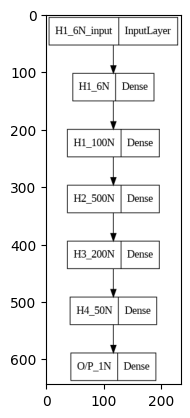

In [42]:
#trying with same architecture as Q1(ii)

model=Sequential()
model.add(Dense(6, input_shape=(7, ), name='H1_6N'))
model.add(Dense(100, name='H1_100N',activation='relu'))
model.add(Dense(500, name='H2_500N',activation='relu'))
model.add(Dense(200, name='H3_200N',activation='relu'))
model.add(Dense(50, name='H4_50N',activation='relu'))
model.add(Dense(1, name='O/P_1N',activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()


# # Plot the model
plot_model(model, to_file='model.png')
# # Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


# Data Preprocessing

In [4]:
train_df['Sex'] = train_df['Sex'].replace({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].replace({'male':0, 'female':1})



In [7]:
train_df['Embarked'] = train_df['Embarked'].replace({'C':0, 'Q':1, 'S':2})
test_df['Embarked'] = test_df['Embarked'].replace({'C':0, 'Q':1, 'S':2})


In [34]:
embarked_median=train_df['Embarked'].median()
train_df['Embarked'].fillna(embarked_median, inplace=True)

In [8]:
train_mean_age = train_df['Age'].mean()
train_df['Age'].fillna(train_mean_age,inplace=True)

test_mean_age = test_df['Age'].mean()
test_df['Age'].fillna(test_mean_age,inplace=True)


In [25]:
test_mean_fare = test_df['Fare'].mean()
test_df['Fare'].fillna(test_mean_fare, inplace=True)

In [35]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [32]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
test_df.describe()

In [ ]:
train_df.describe()

# Model Training

In [36]:
from sklearn.model_selection import train_test_split

X_train=train_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train=train_df[['Survived']]


X_test=test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


In [43]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_split=.10,
          verbose=True)

Epoch 1/50
26/26 [==============================] - 2s 14ms/step - loss: 0.7822 - accuracy: 0.6380 - val_loss: 0.6485 - val_accuracy: 0.6333
Epoch 2/50
26/26 [==============================] - 0s 7ms/step - loss: 0.7228 - accuracy: 0.6479 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 3/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.6604 - val_loss: 0.5943 - val_accuracy: 0.7333
Epoch 4/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6599 - accuracy: 0.6255 - val_loss: 0.5608 - val_accuracy: 0.7000
Epoch 5/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6333 - accuracy: 0.6467 - val_loss: 0.5818 - val_accuracy: 0.7444
Epoch 6/50
26/26 [==============================] - 0s 8ms/step - loss: 0.6158 - accuracy: 0.6929 - val_loss: 0.6039 - val_accuracy: 0.6556
Epoch 7/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6137 - accuracy: 0.6816 - val_loss: 0.5552 - val_accuracy: 0.7222
Epoch 8/50
26/26 [=

In [46]:
model.evaluate(X_train, y_train)

28/28 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8036


[0.43103480339050293, 0.8035914897918701]

###80% accuracy achieved and loss = 0.4310

In [44]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [45]:
print(predictions)

[[0.07272808]
 [0.17834638]
 [0.04008763]
 [0.08514803]
 [0.4085881 ]
 [0.21980362]
 [0.4812035 ]
 [0.13612454]
 [0.7430924 ]
 [0.09488426]
 [0.07503214]
 [0.20315771]
 [0.84380573]
 [0.04442376]
 [0.8069612 ]
 [0.8128073 ]
 [0.11769168]
 [0.13700996]
 [0.3761468 ]
 [0.37671894]
 [0.32431865]
 [0.96913606]
 [0.90628517]
 [0.41695073]
 [0.40949562]
 [0.0325149 ]
 [0.93109745]
 [0.1302855 ]
 [0.290316  ]
 [0.08898506]
 [0.07014386]
 [0.14127965]
 [0.32224333]
 [0.37865296]
 [0.3934676 ]
 [0.14982757]
 [0.43987787]
 [0.59531677]
 [0.0928472 ]
 [0.1860668 ]
 [0.06493933]
 [0.32381642]
 [0.04916005]
 [0.7474625 ]
 [0.8128749 ]
 [0.09124037]
 [0.34941444]
 [0.08582547]
 [0.8795425 ]
 [0.3134929 ]
 [0.3736039 ]
 [0.19903068]
 [0.5032962 ]
 [0.55484617]
 [0.18241702]
 [0.10305982]
 [0.06264914]
 [0.0909734 ]
 [0.07148264]
 [0.6405096 ]
 [0.13549341]
 [0.11623841]
 [0.12581846]
 [0.63832164]
 [0.68929225]
 [0.80194134]
 [0.7103659 ]
 [0.32575214]
 [0.4044863 ]
 [0.36023024]
 [0.5873719 ]
 [0.10

#Writing them to csv file

In [47]:
#first we apply threshold to predictions (using 0.5)
pred_list=[]

for val in predictions:
  if val>=0.5:
    pred_list.append(1)
  else:
    pred_list.append(0)


print(pred_list)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [50]:
data={
    'PassengerId':test_df['PassengerId'],
    'Survived':pred_list
}

new_df=pd.DataFrame(data)

#print(new_df)
new_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [51]:
new_df.to_csv("submission.csv", index=False)